In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import plotly.express as px


df = pd.read_csv("Titanic-Dataset.csv")
df.head()
 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:

df.describe()

df.describe(include='object')

df.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [12]:
df['Title'] = df['Name'].str.extract(r' ([A-Za-z]+)\.', expand=False)
df['Title'].value_counts()


Title
Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Col           2
Mlle          2
Major         2
Ms            1
Mme           1
Don           1
Lady          1
Sir           1
Capt          1
Countess      1
Jonkheer      1
Name: count, dtype: int64

In [14]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1


In [15]:
df['IsAlone'] = (df['FamilySize'] == 1).astype(int)


In [16]:
df['FarePerPerson'] = df['Fare'] / df['FamilySize']


In [17]:
df['AgeBin'] = pd.cut(df['Age'], bins=[0, 12, 18, 35, 60, 100], 
                      labels=['Child', 'Teen', 'YoungAdult', 'Adult', 'Senior'])


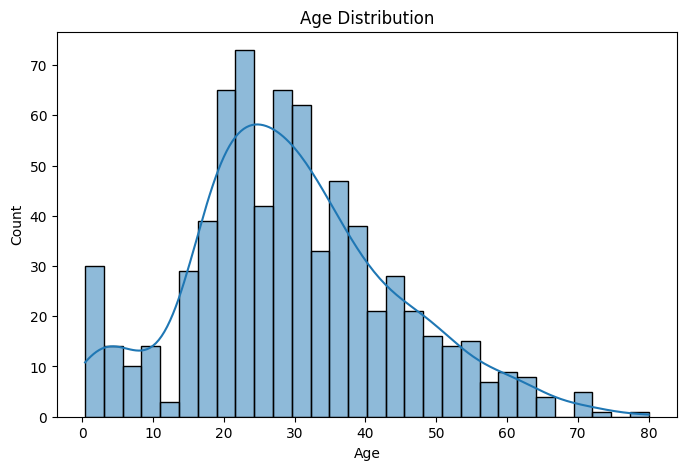

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Age Distribution')
plt.show()


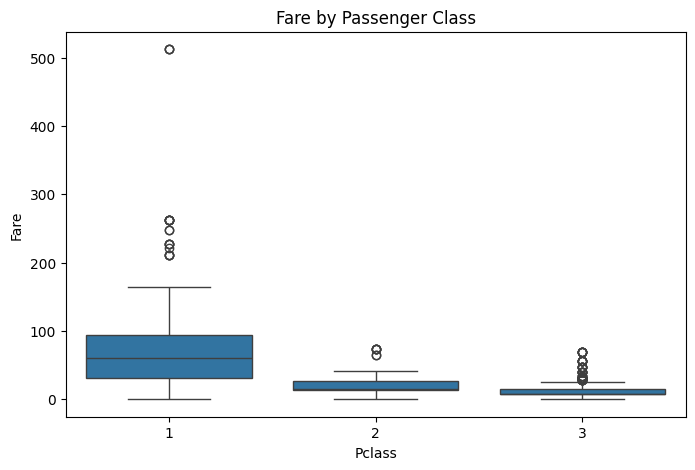

In [19]:
plt.figure(figsize=(8,5))
sns.boxplot(x='Pclass', y='Fare', data=df)
plt.title('Fare by Passenger Class')
plt.show()


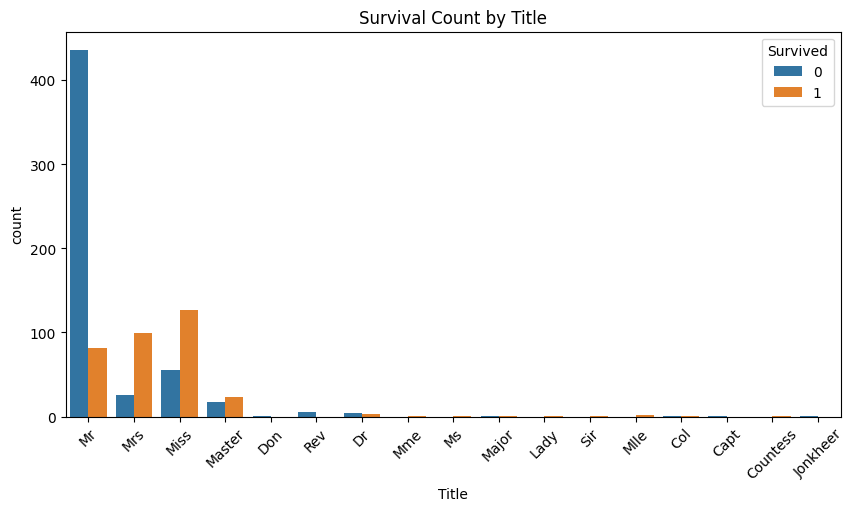

In [20]:
plt.figure(figsize=(10,5))
sns.countplot(x='Title', hue='Survived', data=df)
plt.title('Survival Count by Title')
plt.xticks(rotation=45)
plt.show()


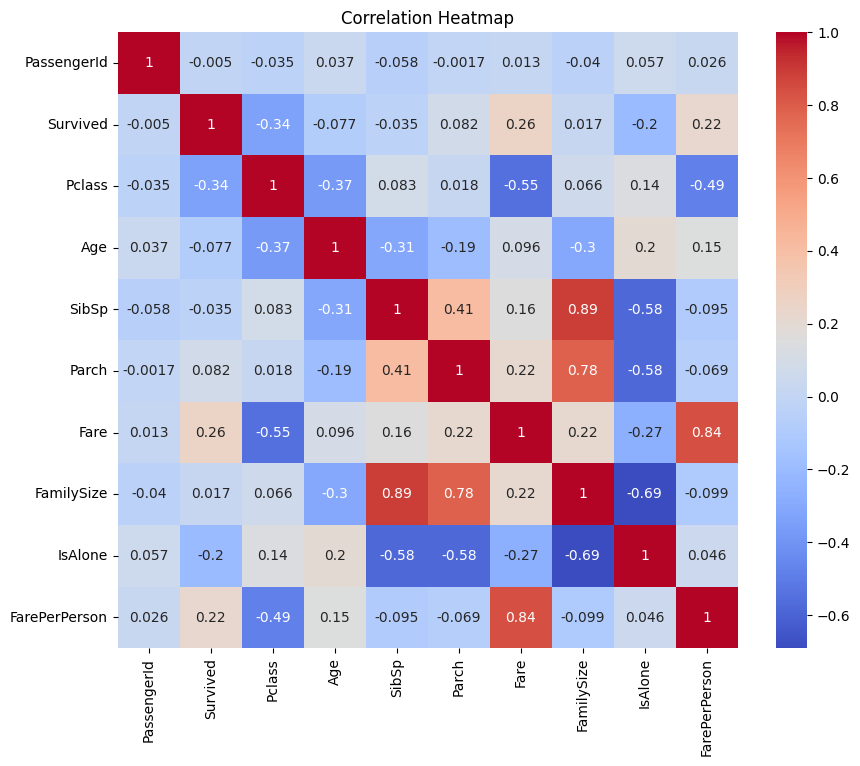

In [21]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


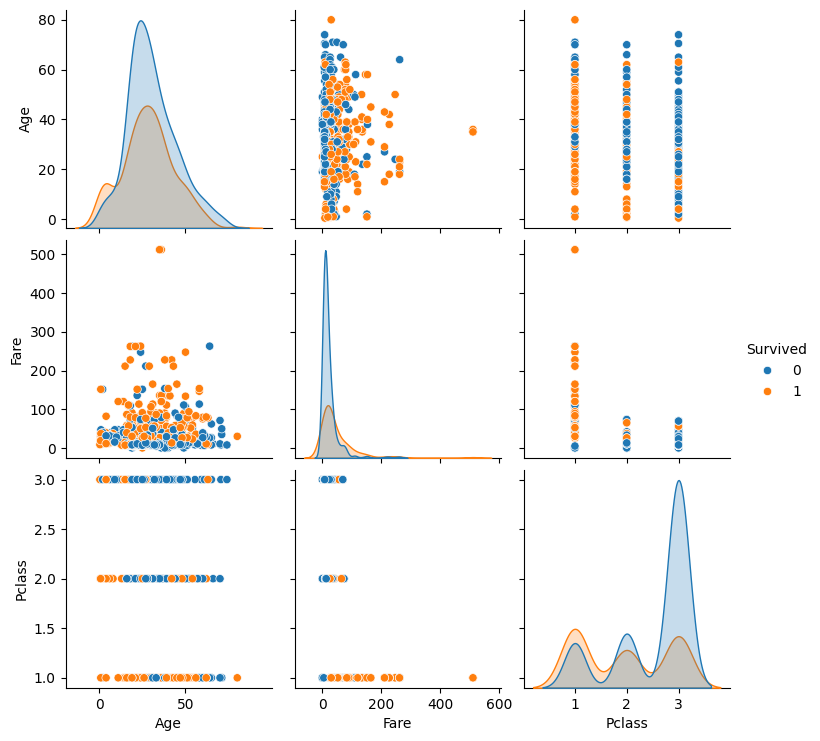

In [22]:
sns.pairplot(df[['Survived', 'Age', 'Fare', 'Pclass', 'Sex']], hue='Survived')
plt.show()


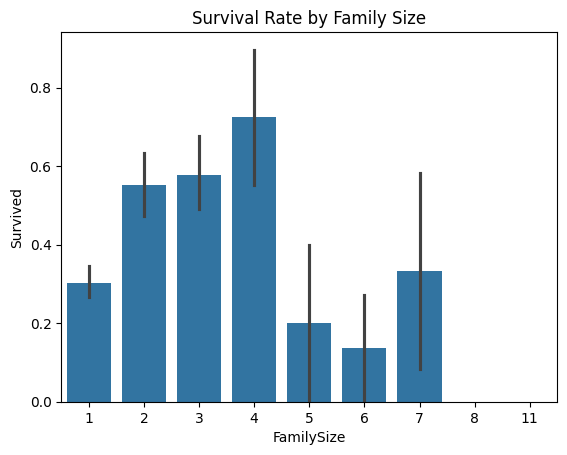

In [23]:
sns.barplot(x='FamilySize', y='Survived', data=df)
plt.title("Survival Rate by Family Size")
plt.show()


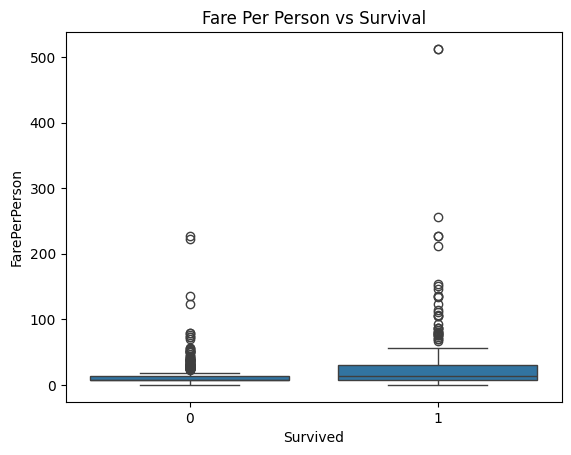

In [24]:
sns.boxplot(x='Survived', y='FarePerPerson', data=df)
plt.title("Fare Per Person vs Survival")
plt.show()
